<a href="https://colab.research.google.com/github/tarunteju2/tarunteju2/blob/main/PES1UG19EC328_ML_AS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X,y=dataset.data,dataset.target

n_samples,n_features=X.shape

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

#scale
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)
#1)model
#f=wx+b ,sigmoid at the end

class LogisticRegression(nn.Module):
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear=nn.Linear(n_input_features,1) #1 for output size
        
    def forward(self,x):
        y_predicted=torch.sigmoid(self.linear(x))
        return y_predicted
model=LogisticRegression(n_features)


#2)loss and optimizer

learning_rate=0.001
criterion=nn.BCELoss()

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

#3)training loop

num_epochs=1000

for epoch in range(num_epochs):
    #Forward pass and loss
    y_predicted=model(X_train)
    loss=criterion(y_predicted,y_train)
    
    #Backward pass
    loss.backward()
    
    #updates
    optimizer.step()
    
    #Zero gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 ==0:
        print(f"epoch: {epoch+1} , loss ={loss.item() : .4f}")
              
with torch.no_grad():
              y_predicted=model(X_test)
              y_predicted_cls=y_predicted.round()
              acc=y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
              print(f"accuarcy = {acc : .4f}")


epoch: 10 , loss = 0.5253
epoch: 20 , loss = 0.5147
epoch: 30 , loss = 0.5047
epoch: 40 , loss = 0.4952
epoch: 50 , loss = 0.4861
epoch: 60 , loss = 0.4774
epoch: 70 , loss = 0.4691
epoch: 80 , loss = 0.4612
epoch: 90 , loss = 0.4537
epoch: 100 , loss = 0.4464
epoch: 110 , loss = 0.4395
epoch: 120 , loss = 0.4328
epoch: 130 , loss = 0.4264
epoch: 140 , loss = 0.4203
epoch: 150 , loss = 0.4144
epoch: 160 , loss = 0.4087
epoch: 170 , loss = 0.4033
epoch: 180 , loss = 0.3980
epoch: 190 , loss = 0.3929
epoch: 200 , loss = 0.3880
epoch: 210 , loss = 0.3833
epoch: 220 , loss = 0.3787
epoch: 230 , loss = 0.3743
epoch: 240 , loss = 0.3700
epoch: 250 , loss = 0.3658
epoch: 260 , loss = 0.3618
epoch: 270 , loss = 0.3579
epoch: 280 , loss = 0.3541
epoch: 290 , loss = 0.3505
epoch: 300 , loss = 0.3469
epoch: 310 , loss = 0.3435
epoch: 320 , loss = 0.3401
epoch: 330 , loss = 0.3369
epoch: 340 , loss = 0.3337
epoch: 350 , loss = 0.3306
epoch: 360 , loss = 0.3276
epoch: 370 , loss = 0.3247
epoch: 380

Accuracy: 0.9468085106382979
              precision    recall  f1-score   support

   Malignant       0.95      0.97      0.96       118
      Benign       0.94      0.91      0.93        70

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



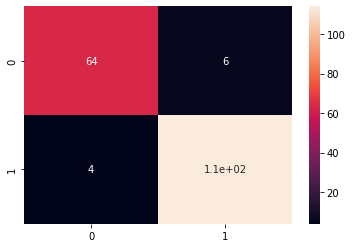

In [ ]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report

dataset = load_breast_cancer(as_frame=True)
df=dataset.frame


#dividing data
X = df.drop("target",axis = 1)
y = df.target


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True, stratify=y)

#Create a Gaussian Classifier
RFclfModel=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RFclfModel.fit(X_train,y_train)

y_pred_RFclfModel=RFclfModel.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RFclfModel))



#confusion_matrix
cv_randForest = confusion_matrix(y_test,y_pred_RFclfModel)
pd.crosstab(y_test, y_pred_RFclfModel, rownames=['True'], colnames=['Predicted'], margins=True)
sns.heatmap(cv_randForest,annot=True)


#classification report
report = classification_report(y_test,y_pred_RFclfModel,labels=[1,0],target_names=["Malignant","Benign"])
print(report)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer(as_frame=True)
df=dataset.frame


#dividing data
X = df.drop("target",axis = 1)
y = df.target


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True, stratify=y)
accuracy=[]
nodes=[]
for i in range(1,200):
  #Create a Gaussian Classifier
  RFclfModel=RandomForestClassifier(n_estimators=i)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  RFclfModel.fit(X_train,y_train)

  y_pred_RFclfModel=RFclfModel.predict(X_test)


  # Model Accuracy, how often is the classifier correct?
  acc = metrics.accuracy_score(y_test, y_pred_RFclfModel)
  accuracy.append(acc)
  nodes.append(i)

print("Max accuracy is achieved at",max(accuracy),accuracy.index(max(accuracy))+1)

plt.plot(nodes,accuracy)
plt.xlabel("Number of nodes")
plt.ylabel("Accuracy achieved")
plt.title("Variation of accuracy with number of nodes")
plt.show()